In [112]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.linalg import cho_factor

import matplotlib.pyplot as plt

In [3]:
d = 2

factor = 10
np.random.seed(5)
e1 = np.zeros(d)
e1[0] = 1

X = np.random.normal(size=d*5).reshape(5,d)
V = factor*X.T.dot(X)

while True:
    theta = np.random.normal(size=d)
    theta /= np.linalg.norm(theta)
    if np.inner(theta, e1) > 0:
        break
print(theta)

e1_inv = np.linalg.solve(V, e1)
e1_norm = np.sqrt(np.inner(e1, e1_inv))

nu = theta - np.inner(e1, theta) / e1_norm**2 * e1_inv
nu_norm_sqr = np.inner(nu-theta, V.dot(nu - theta))
covar  = np.linalg.inv(V)
np.inner(e1,nu)

[0.52688869 0.84993429]


0.0

In [267]:

np.random.seed()
outer = 10
p_total = 0
n_samples = 10000000

for i in range(outer):
    samples = np.random.multivariate_normal(theta, covar, size=n_samples)
    p_sample = np.sum(samples.dot(e1) < 0)/n_samples
    p_total += p_sample
p_sample = p_total / outer
p_sample

5.299999999999999e-06

In [268]:
# p_laplace = np.exp(-1/2 *nu_norm_sqr)/multivariate_normal.pdf(np.zeros(d), cov=covar)

N = multivariate_normal.pdf(np.zeros(d), cov=covar)

p_laplace =  multivariate_normal.pdf(nu, theta, cov=covar)/N/np.sqrt(nu_norm_sqr)/2
p_laplace

7.1081721145456606e-06

In [13]:
N = multivariate_normal.pdf(np.zeros(d), cov=covar)
N

N1 =(2*np.pi)**(-d/2)*np.prod(np.diag(cho_factor(V)[0]))
N1

7.442860862224814

In [269]:
p_sample - p_laplace

-1.8081721145456613e-06

In [262]:
p_sample/p_laplace

0.738027936856371

In [207]:
from scipy.linalg import cho_factor, solve_triangular
d = 2
L, _ = cho_factor(V)
s = 100
theta_unit = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=s)

In [208]:
samples = solve_triangular(L, theta_unit.T).T + theta

In [211]:
amax = np.argmax(X.dot(samples.T), axis=0)
Z = np.zeros((s, len(X)))
# Z[np.vstack((np.arange(s), amax))] = 1
Z[np.arange(s), amax]  =1
np.sum(Z,axis=0)

array([91.,  0.,  0.,  9.,  0.])

In [124]:
X

array([[ 1.74945474, -0.286073  ],
       [-0.48456513, -2.65331856],
       [-0.00828463, -0.31963136],
       [-0.53662936,  0.31540267],
       [ 0.42105072, -1.06560298]])

In [138]:
d= 4
n = 200
M = np.random.normal(size=d*n).reshape(n,d)

467
3962.2426725493665
[0.         0.15716212 1.01716509 1.64968316 1.06927308] [0.00000000e+00 4.38953686e-05 7.77066644e-05 2.14284391e-05
 1.09351848e-04]
nan


/home/johannes/miniconda3/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/johannes/miniconda3/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


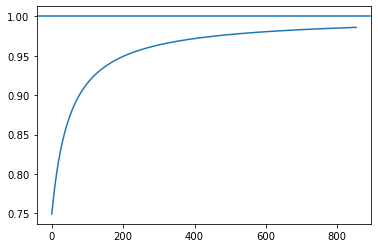

In [313]:
seed = np.random.randint(1000)
# seed = 39
np.random.seed(seed)
print(seed)
d=5


def entropy(q):
    return - np.sum(q * np.log(q))

norm = np.abs(np.random.normal(size=d))
diff = 0.0001*np.abs(np.random.normal(size=d))
norm[0] = 0
diff[0] = 0

def approx(n):
    q = np.exp(-1/2 * n*norm)
    qa = np.exp(-1/2* (n*norm + diff))

#     q[0] = 0
#     qa[0] = 0
#     q[0] = 1 - np.sum(q)
#     qa[0] = 1 - np.sum(qa)

    MI = entropy(q) - entropy(qa)
    

    MI2 =  np.inner(q[1:], diff[1:])*np.log((1 - np.sum(q[1:]))/np.sum(q[1:]))/2
    return MI, MI2

MI = []
MI2 = []
for n in range(50,2000):
    mi, mi2 = approx(n)
    MI.append(mi/mi2)
#     MI2.append(mi2)

plt.plot(MI)
plt.plot(MI2)
plt.axhline(1)
print(1/np.sum(diff))
print(norm, diff)
# plt.yscale('log')
print(mi/mi2)

In [345]:
import pandas as pd
d = {
    'a': (1, 101),
    'b': (2, 202),
    'c': np.array([[1,2,3], [3,4,5]])
}

In [346]:
print(df.to_csv(index=False))

a,b,c
1,2,3
101,202,303



In [347]:
def flatten_data_dict(data):
    keys = [*data.keys()]
    for key in keys:
        items = data[key]

        if isinstance(items[0], np.ndarray) and items[0].ndim == 1:
            items = np.array(items)
            for i, col in enumerate(items.T):
                data[f'{key}_{i}'] = col
            del data[key]

In [348]:
flatten_data_dict(d)

In [349]:
d

{'a': (1, 101),
 'b': (2, 202),
 'c_0': array([1, 3]),
 'c_1': array([2, 4]),
 'c_2': array([3, 5])}

In [350]:
df = pd.DataFrame.from_dict(d, orient='columns')

In [351]:
df

,a,b,c_0,c_1,c_2
0,1,2,1,2,3
1,101,202,3,4,5


In [352]:
X = np.ones((30,3))
rho = np.arange(30)
(X.T*rho).T

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.],
       [ 7.,  7.,  7.],
       [ 8.,  8.,  8.],
       [ 9.,  9.,  9.],
       [10., 10., 10.],
       [11., 11., 11.],
       [12., 12., 12.],
       [13., 13., 13.],
       [14., 14., 14.],
       [15., 15., 15.],
       [16., 16., 16.],
       [17., 17., 17.],
       [18., 18., 18.],
       [19., 19., 19.],
       [20., 20., 20.],
       [21., 21., 21.],
       [22., 22., 22.],
       [23., 23., 23.],
       [24., 24., 24.],
       [25., 25., 25.],
       [26., 26., 26.],
       [27., 27., 27.],
       [28., 28., 28.],
       [29., 29., 29.]])

In [367]:
d=3
X = (((np.arange(2**d)[:,None] & (1 << np.arange(d)))) > 0).astype(int)

In [368]:
np.vstack((X,X))

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])